In [1]:
from ml_aos.lightning import WaveNet
from ml_aos.dataloader import Donuts
import matplotlib.pyplot as plt

In [3]:
model=WaveNet.load_from_checkpoint('/astro/users/driemann/ml-aos/lightning_logs/version_3/checkpoints/epoch=185-step=28086.ckpt')
model.eval()

WaveNet(
  (donut_net): DonutNet(
    (layers): ModuleList(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): DownBlock(
        (layers): ModuleList(
          (0): SkipBlock(
            (layers): Sequential(
              (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
              (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
            )
          )
          (1): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): ReLU(inplace=True)
        )
      )
      (4): DownBlock(
        (layers): ModuleList(
          (0): SkipBlock(
            (layers): Sequential(
              (0): Conv2d(16, 16, kernel_size=(3, 3

In [5]:
#model1=WaveNet.load_from_checkpoint('/astro/use/driemann/ml-aos/lightning_logs/version_2/checkpoints/epoch=99-step=10900.ckpt')
#model1.eval()

In [6]:
train=Donuts()
train[0]
dof_pred=model(train[0]['image'][None, ...], train[0]['intrafocal'][None, ...])

In [7]:
train[0]['image'][None, ...]

tensor([[[[ -5.9135,  -1.8532,  -5.0296,  ...,  -9.3004,  -9.3995,  18.6863],
          [  9.7982,  11.6905,  15.2649,  ...,   8.9152,   6.8301,   7.9983],
          [ -2.6015,   9.8712, -14.3247,  ..., -10.0896, -25.4073,   0.9291],
          ...,
          [ -8.6291,  10.3046,   4.3394,  ...,   0.2466, -10.6693,  -1.4102],
          [ -7.7192,  35.4381, -14.9409,  ...,   4.6253,  -4.8229, -15.9887],
          [ 19.9876,  -8.0251,  -9.1735,  ..., -10.0698,  -2.0732,  10.6793]]]])

In [8]:
train[0]['intrafocal'][None, ...].shape

torch.Size([1, 1])

In [9]:
test=Donuts('test')

In [10]:
train[0]

{'image': tensor([[[ -5.9135,  -1.8532,  -5.0296,  ...,  -9.3004,  -9.3995,  18.6863],
          [  9.7982,  11.6905,  15.2649,  ...,   8.9152,   6.8301,   7.9983],
          [ -2.6015,   9.8712, -14.3247,  ..., -10.0896, -25.4073,   0.9291],
          ...,
          [ -8.6291,  10.3046,   4.3394,  ...,   0.2466, -10.6693,  -1.4102],
          [ -7.7192,  35.4381, -14.9409,  ...,   4.6253,  -4.8229, -15.9887],
          [ 19.9876,  -8.0251,  -9.1735,  ..., -10.0698,  -2.0732,  10.6793]]]),
 'intrafocal': tensor([1.]),
 'dof': tensor([ 0.0067,  0.5439, -0.0284])}

In [11]:
train[0]['intrafocal'][None, ...]train[0]['intrafocal'][None, ...]

SyntaxError: invalid syntax (1409202001.py, line 1)

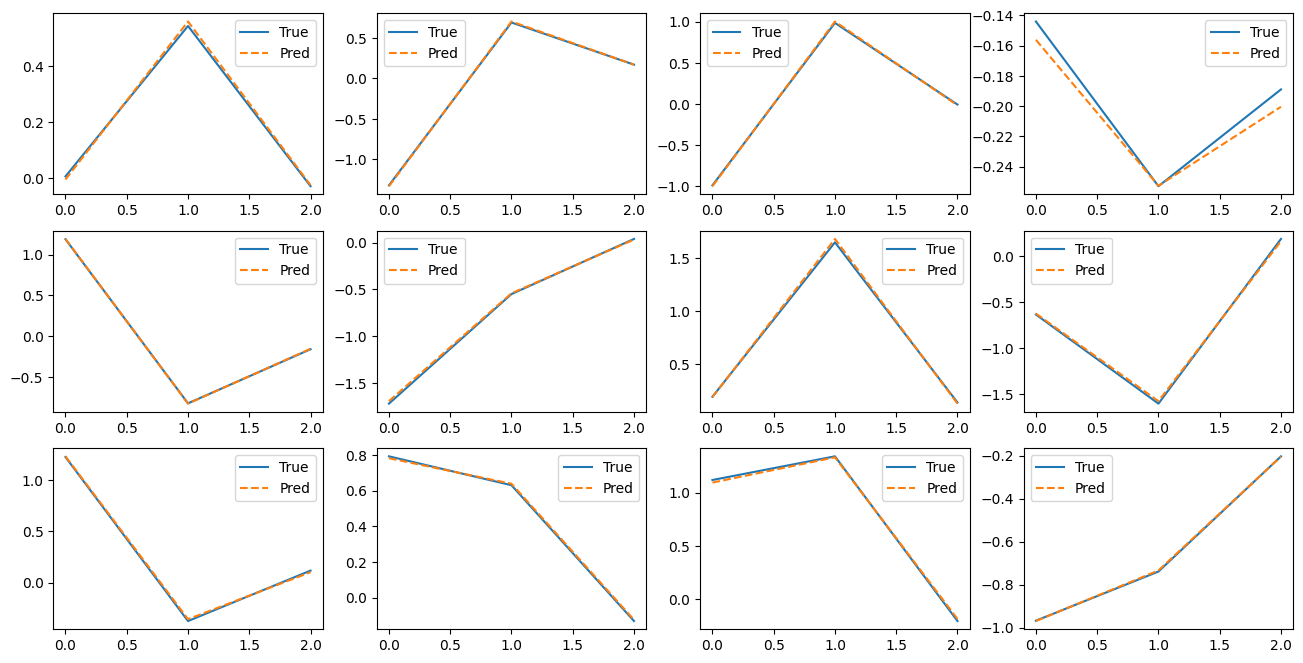

In [12]:
fig, axes = plt.subplots(3, 4, figsize=(16, 8))
for i,ax in enumerate(axes.flatten()):
    ax.plot(train[i]['dof'], label="True")
    dof_pred=model(train[i]['image'][None, ...], train[i]['intrafocal'][None, ...])
    ax.plot(dof_pred.detach().numpy().flatten(), ls='--', label='Pred')
    ax.legend()
    #ax.set(ylim=(-1E-3, +1E-3))
    
    
#axes.plot(train[0]['dof'], label="True")
#axes.plot(opd_pred.detach().numpy().flatten(), ls="--", label="Pred")
#axes.legend()

In [14]:
losses = []
for i in range(10_000):
    data, truth = ...[i]
    pred = model(data)
    losses.append(np.mean((pred-truth)**2))

losses = np.array(losses)


idx = sorted_indices


<>:3: SyntaxWarning: 'ellipsis' object is not subscriptable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'ellipsis' object is not subscriptable; perhaps you missed a comma?
/tmp/ipykernel_81071/259790655.py:3: SyntaxWarning: 'ellipsis' object is not subscriptable; perhaps you missed a comma?
  data, truth = ...[i]
/tmp/ipykernel_81071/259790655.py:3: SyntaxWarning: 'ellipsis' object is not subscriptable; perhaps you missed a comma?
  data, truth = ...[i]
/tmp/ipykernel_81071/259790655.py:3: SyntaxWarning: 'ellipsis' object is not subscriptable; perhaps you missed a comma?
  data, truth = ...[i]


TypeError: 'ellipsis' object is not subscriptable

In [39]:
axes.flatten()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

array([-6.5651350e-04,  1.2763143e-03, -1.5543327e-03,  1.0001717e+00,
        7.0376322e-04, -2.7675927e-04, -1.1626557e-03,  9.9913812e-01,
        5.6175888e-04,  6.5888092e-04,  2.6574358e-04,  9.9930656e-01],
      dtype=float32)

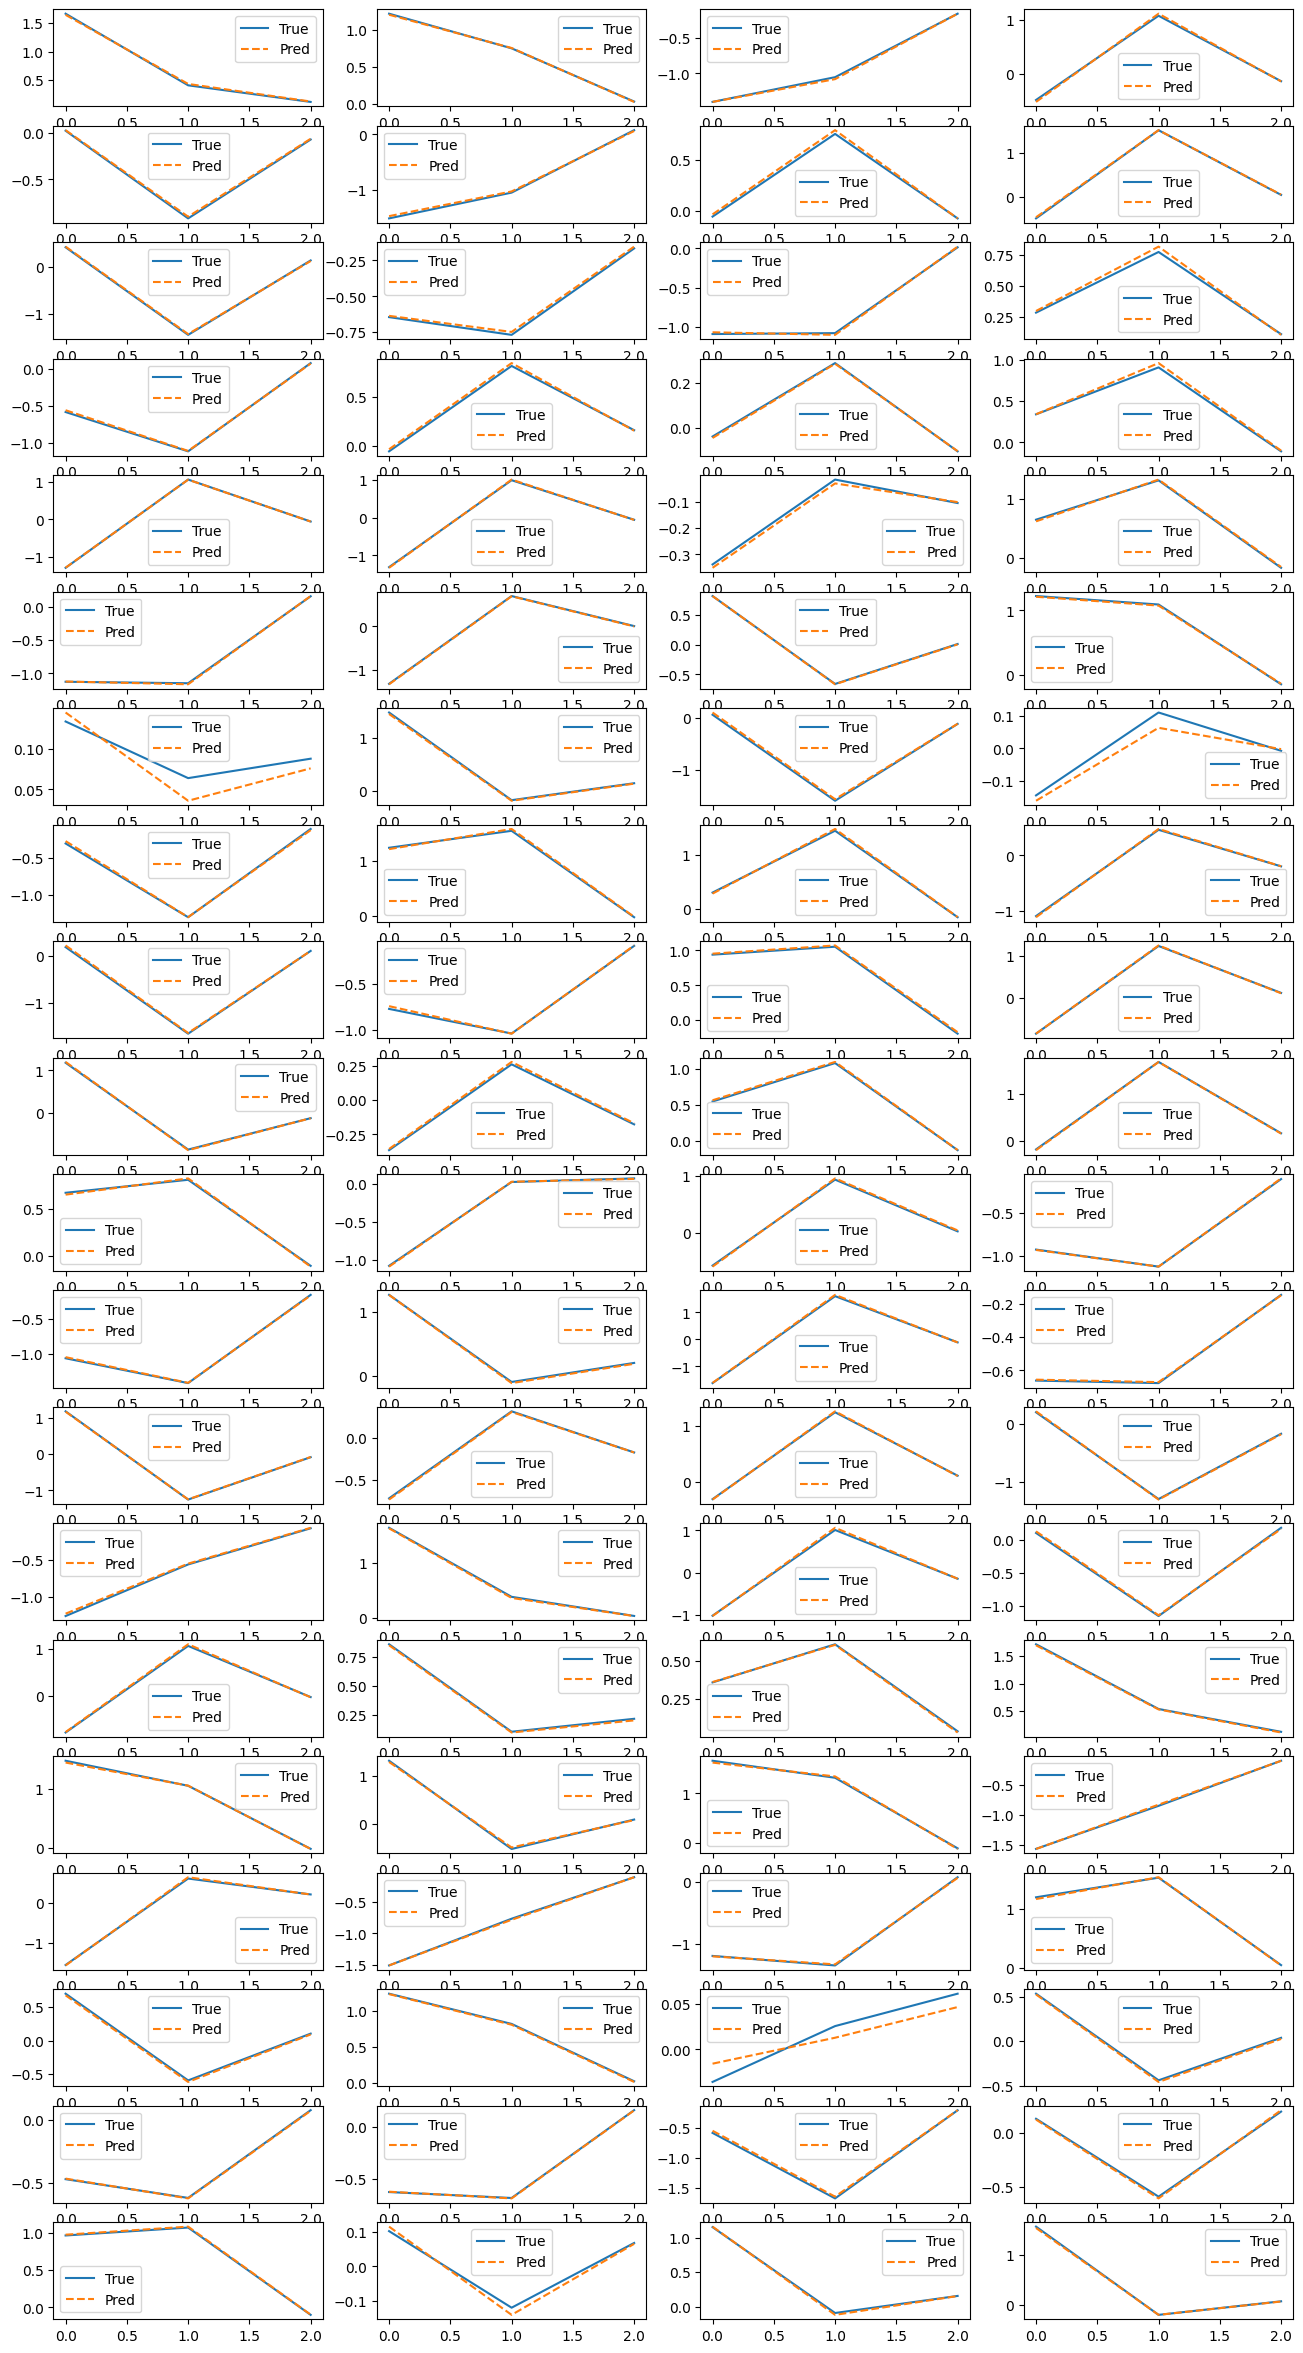

In [20]:
fig, axes = plt.subplots(20, 4, figsize=(16, 30))
for i,ax in enumerate(axes.flatten()):
    ax.plot(test[i]['dof'], label="True")
    dof_pred=model(test[i]['image'][None, ...], test[i]['intrafocal'][None, ...])
    ax.plot(dof_pred.detach().numpy().flatten(), ls='--', label='Pred')
    ax.legend()
    